## Cadeias de Markov em: Café ou Acarajé

No início desse relatório, temos as funções que serão usadas ao decorrer da solução.

Aqui temos duas soluções: uma calculando o M.L.E de 50 dados (onde o dado procurado está entre eles) e escolhendo o que possui o maior e a segunda pela técnica de Stochastic Hill Climbing.

In [643]:
import numpy as np
from random import random
from time import sleep

# Função que gera um array de 6 posições com números aleatórios
def generate_random_dice():
    numbers = np.array([0, 0, 0, 0, 0, 0], dtype=float)
    for i in range(len(numbers)):
        numbers[i] = random()
    sum_numbers = sum(numbers)
    for i in range(len(numbers)):
        numbers[i] = numbers[i] / sum_numbers
    return numbers

# Função que imprime uma matriz
# matrix: matriz a ser impressa
def print_matriz(matrix):
        # Criar labels para as linhas
    labels = np.arange(1, matrix.shape[0] + 1)

    # Imprimir labels das colunas
    print("   ", end="")
    for j in range(matrix.shape[1]):
        print(f"{j+1:5}", end="")
    print()

    # Imprimir matriz com labels das linhas
    for i in range(matrix.shape[0]):
        print(f"{labels[i]:2} |", end="")
        for j in range(matrix.shape[1]):
            print(f"{matrix[i, j]:5.2f}", end="")
        print()

# Roda o algoritmo de Markov
# matrix: matriz de transição inicial
# quantidade: passos de Markov
# printar: se True, imprime as matrizes intermediárias
def rodar_markov(matrix, quantidade, printar=True):
    actual = matrix
    if printar:
        print(f"MATRIZ {1} POSIÇÃO:")
        print_matriz(actual)
    for i in range(1, quantidade):
        if printar:
            print()
            print(f"MATRIZ {i+1} POSIÇÃO:")
        actual = np.dot(actual, matrix)
        if printar:
            print_matriz(actual)
    return actual

# Cria uma matriz considerando as regras do jogo Café ou Acarajé
# array: array com as probabilidades de cada dado
def create_matrix(array):
    return np.array([
    [ 0 , array[0], array[1], array[2], array[3]+array[5], array[4], 0],
    [ 0 , 0, array[0], array[1]+array[5], array[2]+array[4], array[3], 0],
    [ 0 , 0, array[5], array[0]+array[4], array[1]+array[3], array[2], 0],
    [ 0 , 0, 0, 0, 0, 0, 1],
    [array[5], array[4], array[3], array[2], array[1], array[0], 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0]
])

def printar_dados(array):
    print(f"1: {array[0]:.2f} \t 2: {array[1]:.2f}\t",
    f"3: {array[2]:.2f} \t 4: {array[3]:.2f} \t"
    f"5: {array[4]:.2f} \t 6: {array[5]:.2f}")

def jogar_dados(quantidade, probabilities):
    data = []
    if abs(probabilities.sum() - 1) > 0.001:
        raise ValueError("Probabilidades devem somar 1")
    for i in range(quantidade):
        posicao = 1
        count = 0
        while True:
            if posicao == 4 or posicao == 6:
                break
            count += 1
            dado = np.random.choice([1, 2, 3, 4, 5, 6], p=probabilities)
            if dado + posicao <= 6:
                posicao += dado
            else:
                posicao = 12 - dado - posicao
        cafe_ou_acaraje = "Café" if posicao == 4 else "Acarajé"
        data.append((count, cafe_ou_acaraje))
    return data

def arrays_sao_iguais(array1, array2):
    # Verifica se os tamanhos são iguais
    if len(array1) != len(array2):
        return False
    
    # Compara os elementos
    for i in range(len(array1)):
        if array1[i] != array2[i]:
            return False
    
    return True

def barrinha(actual, max_value):
    kamin = actual// (int) (max_value*0.1)
    tepan = (max_value-actual)// (int) (max_value*0.1)
    print(kamin * '=' + ">" +  tepan * '#', end="\r")

In [640]:
import numpy as np
from time import sleep
from random import random, choice
from collections import Counter
from matplotlib import pyplot as plt

### Escolhendo entre dados

In [601]:
quantidade_passos = 50
plot_y = np.zeros(quantidade_passos)
plot_x = np.zeros(quantidade_passos)

quantidade_de_dados = 10
passo = 2

In [603]:
for k in range(1,quantidade_passos+1):
    acertos = 0
    for i in range(50):
        
        dados = []
        for i in range(quantidade_de_dados):
            dados.append(generate_random_dice())
        
        dado_escolhido = choice(dados)
        
        jogadas = jogar_dados(passo*k, probabilities=dado_escolhido)
        
        jogadas_unicas = Counter(jogadas)
        
        loglikelihoods = np.zeros(len(dados))
        
        for (quantidade, label), value in jogadas_unicas.items():
            label = 3 if label == "Café" else 5
            for index, dice in enumerate(dados):
                markov = rodar_markov(create_matrix(dice), quantidade=quantidade, printar=False)
                loglikelihoods[index] += np.log(markov[0][label]) * value
        
        max_index = np.argmax(loglikelihoods)

        if arrays_sao_iguais(dados[max_index], dado_escolhido):
            acertos += 1
    plot_y[k-1] = acertos/50
    plot_x[k-1] = passo*k

    barrinha(k, quantidade_passos)

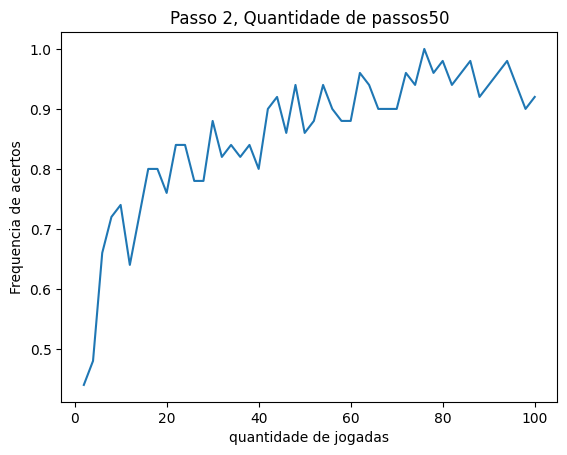

In [218]:
plt.title(f"Passo {passo}, Quantidade de passos{quantidade_passos}")
plt.xlabel("quantidade de jogadas")
plt.ylabel("Frequencia de acertos")
plt.plot(plot_x,plot_y)

In [220]:
print(plot_x)
print(plot_y)

[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100.]
[0.44 0.48 0.66 0.72 0.74 0.64 0.72 0.8  0.8  0.76 0.84 0.84 0.78 0.78
 0.88 0.82 0.84 0.82 0.84 0.8  0.9  0.92 0.86 0.94 0.86 0.88 0.94 0.9
 0.88 0.88 0.96 0.94 0.9  0.9  0.9  0.96 0.94 1.   0.96 0.98 0.94 0.96
 0.98 0.92 0.94 0.96 0.98 0.94 0.9  0.92]


### Hill Climbing
Nos blocos abaixo, usaremos a técnica chamada Stochastic Hill Climbing para conseguir chegar no melhor Likelihood e estimar o melhor dado. O primeiro bloco simplesmente gera um dado aleatório e joga com ele para gerar dados iniciais.

In [652]:
dado_a_ser_procurado = generate_random_dice()

In [654]:
jogadas = jogar_dados(1000, probabilities=dado_a_ser_procurado)
jogadas_unicas = Counter(jogadas)
jogadas_unicas

Counter({(2, 'Café'): 148,
         (2, 'Acarajé'): 125,
         (1, 'Acarajé'): 101,
         (3, 'Café'): 99,
         (3, 'Acarajé'): 87,
         (1, 'Café'): 68,
         (4, 'Café'): 58,
         (4, 'Acarajé'): 50,
         (5, 'Acarajé'): 47,
         (6, 'Café'): 41,
         (5, 'Café'): 34,
         (7, 'Acarajé'): 25,
         (6, 'Acarajé'): 21,
         (7, 'Café'): 20,
         (9, 'Café'): 12,
         (10, 'Café'): 11,
         (8, 'Acarajé'): 11,
         (8, 'Café'): 10,
         (10, 'Acarajé'): 6,
         (9, 'Acarajé'): 5,
         (11, 'Café'): 5,
         (12, 'Café'): 4,
         (11, 'Acarajé'): 3,
         (13, 'Café'): 3,
         (14, 'Café'): 2,
         (18, 'Acarajé'): 1,
         (15, 'Acarajé'): 1,
         (23, 'Café'): 1,
         (20, 'Café'): 1})

No próximo bloco possuimos 2 funções extremamente importante para a técnica: calcular o log likelihood e a de gerar o próximo vizinho. A primeira será a nossa medida para definir qual vizinho é melhor e a segunda gera um vizinho aleatório na vizinhança.

In [656]:
def calcular_log_likelihood(jogadas, dado):
    loglikelihood = 0
    for (quantidade, label), value in jogadas.items():
        label = 3 if label == "Café" else 5
        markov = rodar_markov(create_matrix(dado), quantidade=quantidade, printar=False)
        loglikelihood += np.log(markov[0][label]) * value
    return loglikelihood

def generate_neighbor(probabilities, step_size=0.05):
    neighbor = probabilities.copy()
    n = len(neighbor)
    
    i, j = np.random.choice(n, 2, replace=False)
    
    adjustment = np.random.uniform(-step_size, step_size)

    if neighbor[i] + adjustment < 0 or neighbor[j] - adjustment < 0:
        adjustment = -adjustment

    # Apply the adjustment
    neighbor[i] += adjustment
    neighbor[j] -= adjustment

    # Ensure the resulting probabilities sum to 1
    assert np.isclose(sum(neighbor), 1.0), "Probabilities do not sum to 1"
    
    return neighbor

Agora, fazemos a execução o Hill Climbing. Escolhemos um dado aleatório para começar nossa busca e a iniciamos da seguinte maneira: calculamos o seu M.L.E. e de  um vizinho. Se o M.L.E do vizinho for maior, ele vira o nosso alvo atual. E assim continuamos até termos testado 100 vizinhos (não necessariamente andado por todos).

In [661]:
from numpy.random import rand

initial_dice = generate_random_dice()

melhor_loglikelihood = calcular_log_likelihood(jogadas_unicas, initial_dice)

for i in range(100):
    vizinho = generate_neighbor(initial_dice)
    outro_loglikelihood = calcular_log_likelihood(jogadas_unicas, vizinho)
    
    if outro_loglikelihood > melhor_loglikelihood:
        melhor_loglikelihood = outro_loglikelihood
        initial_dice = vizinho
    #print(melhor_loglikelihood)

Nessa parte, fazemos o mesmo hill climbing porém para n dados iniciais diferentes, com o objetivo de fugir de máximos locais e planos.

In [664]:
from numpy.random import rand

dados = []
loglikelihoods = []

for k in range(100):
    initial_dice = generate_random_dice()
    
    melhor_loglikelihood = calcular_log_likelihood(jogadas_unicas, initial_dice)
    
    for i in range(50):
        vizinho = generate_neighbor(initial_dice)
        outro_loglikelihood = calcular_log_likelihood(jogadas_unicas, vizinho)
        
        if outro_loglikelihood > melhor_loglikelihood:
            melhor_loglikelihood = outro_loglikelihood
            initial_dice = vizinho
    dados.append(initial_dice)
    loglikelihoods.append(melhor_loglikelihood)
    barrinha(k, quantidade_passos)

C:\Users\dimit\AppData\Local\Temp\ipykernel_26120\3528301384.py:6: RuntimeWarning: invalid value encountered in log
  loglikelihood += np.log(markov[0][label]) * value


In [680]:
max_index = loglikelihoods.index(max(loglikelihoods))

print("M.L.E. encontrada:\t\t", max(loglikelihoods), "\t" , dados[max_index])
print("M.L.E. do dado procurado:\t", calcular_log_likelihood(jogadas_unicas, dado_a_ser_procurado),"\t" , dado_a_ser_procurado)

M.L.E. encontrada:		 -2760.4419034264984 	 [0.17045984 0.202712   0.07255243 0.26937238 0.10303767 0.18186568]
M.L.E. do dado procurado:	 -2761.477302308788 	 [0.18127528 0.22974404 0.07253418 0.25904178 0.10762235 0.14978237]


In [687]:
import numpy as np
from scipy.stats import entropy

# Log-likelihood values
mle_encontrada = max(loglikelihoods)
mle_dado_procurado = calcular_log_likelihood(jogadas_unicas, dado_a_ser_procurado)

# Probability distributions
prob_encontrada = dados[max_index]
prob_dado_procurado = dado_a_ser_procurado

# Diferença de Log-Likelihood
delta_ll = abs(mle_encontrada - mle_dado_procurado)
print(f"Diferença de Log-Likelihood: {delta_ll}")

# Distância Euclidiana
dist_euclidiana = np.linalg.norm(prob_encontrada - prob_dado_procurado)
print(f"Distância Euclidiana: {dist_euclidiana}")

# Divergência de Kullback-Leibler
kl_divergence = entropy(prob_dado_procurado, prob_encontrada)
print(f"Divergência de Kullback-Leibler: {kl_divergence}")

Diferença de Log-Likelihood: 1.035398882289428
Distância Euclidiana: 0.04477482364289146
Divergência de Kullback-Leibler: 0.005377288260761219


### Referências

https://pages.cs.wisc.edu/~jerryzhu/cs540/handouts/hillclimbing.pdf

https://www.geeksforgeeks.org/introduction-hill-climbing-artificial-intelligence/

https://impa.br/wp-content/uploads/2017/04/10_CBM_75_03.pdf

https://athena.ecs.csus.edu/~gordonvs/180/WeeklyNotes/12A_hillClimbingSimulatedAnnealing.pdf

https://stats.stackexchange.com/questions/47685/calculating-log-likelihood-for-given-mle-markov-chains